In [2]:

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline

# Load the dataset
df = pd.read_csv('TEST.csv')

In [3]:
df

,startdate,enddate,landfalldate,landfall_time,windspeed,rainfall24,rainfall6,rainfallaverage,ricearea,riceyield,distance,areayieldrataio,percentageofdamagedarea,damagedarea,yieldafterdamage,farmgateprice,damagecosttorice
0,06/09/2018,17/09/2018,14/09/2018,21:00:00,0.000000,1.535972,3.032222,0.959983,2870.00,3.37,0.00000,851.632047,0.247070,709.091324,0.832626,20.79,1.113550e+07
1,06/09/2018,17/09/2018,14/09/2018,21:00:00,0.000000,2.141071,3.942857,1.338170,491.00,4.36,0.00000,112.614679,0.244428,120.014173,1.065706,20.79,2.412279e+06
2,06/09/2018,17/09/2018,14/09/2018,21:00:00,7.116629,5.809375,20.589580,3.630859,1330.88,4.42,385.79860,301.104072,0.312983,416.543187,1.383386,20.79,1.086828e+07
3,06/09/2018,17/09/2018,14/09/2018,21:00:00,67.089467,3.908854,11.341670,2.443034,5767.00,4.65,26.26015,1240.215054,0.567852,3274.800267,2.640510,20.79,1.630911e+08
4,06/09/2018,17/09/2018,14/09/2018,21:00:00,0.000000,0.805469,1.580208,0.503418,4710.00,4.14,0.00000,1137.681159,0.130472,614.521934,0.540153,20.79,6.260539e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39739,09/11/2020,15/11/2020,11/11/2020,18:00:00,8.841748,2.292639,4.211667,1.432899,916.00,3.16,392.92250,289.873418,0.203710,186.598393,0.643724,20.79,2.265505e+06
39740,09/11/2020,15/11/2020,11/11/2020,18:00:00,0.000000,0.030208,0.062500,0.018880,1046.00,3.07,0.00000,340.716612,0.556501,582.100434,1.708459,20.79,1.875686e+07
39741,09/11/2020,15/11/2020,11/11/2020,18:00:00,8.575491,2.652500,5.460000,1.657812,753.00,4.52,291.88280,166.592920,0.161440,121.564092,0.729707,20.79,1.673060e+06
39742,09/11/2020,15/11/2020,11/11/2020,18:00:00,9.387123,1.696181,3.348611,1.060113,99.00,1.93,496.10710,51.295337,0.154780,15.323183,0.298725,20.79,8.633316e+04


In [7]:
# Let's say you want to add a new column 'new_column' right after 'existing_column'
df['windspeednterpolatedfirst'] = df['windspeed'].interpolate(method='linear', inplace=True) # Add the new column to the end of the DataFrame

# Create a new DataFrame with the desired column order
cols = df.columns.tolist()  # Get a list of the columns
idx = cols.index('windspeed')  # Find the index of 'existing_column'
cols = cols[:idx+1] + ['windspeednterpolatedfirst'] + cols[idx+1:-1]  # Create the new column order
df = df[cols]  # Create

In [8]:
df

,startdate,enddate,landfalldate,landfall_time,windspeed,windspeednterpolatedfirst,rainfall24,rainfall6,rainfallaverage,ricearea,riceyield,distance,areayieldrataio,percentageofdamagedarea,damagedarea,yieldafterdamage,farmgateprice,damagecosttorice
0,06/09/2018,17/09/2018,14/09/2018,21:00:00,0.000000,None,1.535972,3.032222,0.959983,2870.00,3.37,0.00000,851.632047,0.247070,709.091324,0.832626,20.79,1.113550e+07
1,06/09/2018,17/09/2018,14/09/2018,21:00:00,0.000000,None,2.141071,3.942857,1.338170,491.00,4.36,0.00000,112.614679,0.244428,120.014173,1.065706,20.79,2.412279e+06
2,06/09/2018,17/09/2018,14/09/2018,21:00:00,7.116629,None,5.809375,20.589580,3.630859,1330.88,4.42,385.79860,301.104072,0.312983,416.543187,1.383386,20.79,1.086828e+07
3,06/09/2018,17/09/2018,14/09/2018,21:00:00,67.089467,None,3.908854,11.341670,2.443034,5767.00,4.65,26.26015,1240.215054,0.567852,3274.800267,2.640510,20.79,1.630911e+08
4,06/09/2018,17/09/2018,14/09/2018,21:00:00,0.000000,None,0.805469,1.580208,0.503418,4710.00,4.14,0.00000,1137.681159,0.130472,614.521934,0.540153,20.79,6.260539e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39739,09/11/2020,15/11/2020,11/11/2020,18:00:00,8.841748,None,2.292639,4.211667,1.432899,916.00,3.16,392.92250,289.873418,0.203710,186.598393,0.643724,20.79,2.265505e+06
39740,09/11/2020,15/11/2020,11/11/2020,18:00:00,0.000000,None,0.030208,0.062500,0.018880,1046.00,3.07,0.00000,340.716612,0.556501,582.100434,1.708459,20.79,1.875686e+07
39741,09/11/2020,15/11/2020,11/11/2020,18:00:00,8.575491,None,2.652500,5.460000,1.657812,753.00,4.52,291.88280,166.592920,0.161440,121.564092,0.729707,20.79,1.673060e+06
39742,09/11/2020,15/11/2020,11/11/2020,18:00:00,9.387123,None,1.696181,3.348611,1.060113,99.00,1.93,496.10710,51.295337,0.154780,15.323183,0.298725,20.79,8.633316e+04


In [5]:
df['windspeed'].interpolate(method='linear', inplace=True)
df['rainfall24'].interpolate(method='linear', inplace=True)

In [6]:
df

,startdate,enddate,landfalldate,landfall_time,windspeed,rainfall24,rainfall6,rainfallaverage,ricearea,riceyield,distance,areayieldrataio,percentageofdamagedarea,damagedarea,yieldafterdamage,farmgateprice,damagecosttorice
0,06/09/2018,17/09/2018,14/09/2018,21:00:00,0.000000,1.535972,3.032222,0.959983,2870.00,3.37,0.00000,851.632047,0.247070,709.091324,0.832626,20.79,1.113550e+07
1,06/09/2018,17/09/2018,14/09/2018,21:00:00,0.000000,2.141071,3.942857,1.338170,491.00,4.36,0.00000,112.614679,0.244428,120.014173,1.065706,20.79,2.412279e+06
2,06/09/2018,17/09/2018,14/09/2018,21:00:00,7.116629,5.809375,20.589580,3.630859,1330.88,4.42,385.79860,301.104072,0.312983,416.543187,1.383386,20.79,1.086828e+07
3,06/09/2018,17/09/2018,14/09/2018,21:00:00,67.089467,3.908854,11.341670,2.443034,5767.00,4.65,26.26015,1240.215054,0.567852,3274.800267,2.640510,20.79,1.630911e+08
4,06/09/2018,17/09/2018,14/09/2018,21:00:00,0.000000,0.805469,1.580208,0.503418,4710.00,4.14,0.00000,1137.681159,0.130472,614.521934,0.540153,20.79,6.260539e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39739,09/11/2020,15/11/2020,11/11/2020,18:00:00,8.841748,2.292639,4.211667,1.432899,916.00,3.16,392.92250,289.873418,0.203710,186.598393,0.643724,20.79,2.265505e+06
39740,09/11/2020,15/11/2020,11/11/2020,18:00:00,0.000000,0.030208,0.062500,0.018880,1046.00,3.07,0.00000,340.716612,0.556501,582.100434,1.708459,20.79,1.875686e+07
39741,09/11/2020,15/11/2020,11/11/2020,18:00:00,8.575491,2.652500,5.460000,1.657812,753.00,4.52,291.88280,166.592920,0.161440,121.564092,0.729707,20.79,1.673060e+06
39742,09/11/2020,15/11/2020,11/11/2020,18:00:00,9.387123,1.696181,3.348611,1.060113,99.00,1.93,496.10710,51.295337,0.154780,15.323183,0.298725,20.79,8.633316e+04


windspeed           0.124798
rainfall24          0.078049
rainfall6           0.110739
rainfallaverage     0.078049
area                0.656873
yield               0.320771
distance            0.066964
areayieldrataio     0.490851
percentageofarea    0.392754
darea               0.913482
yielda              0.511793
fgprice             0.047418
Name: dctrice, dtype: float64


c:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


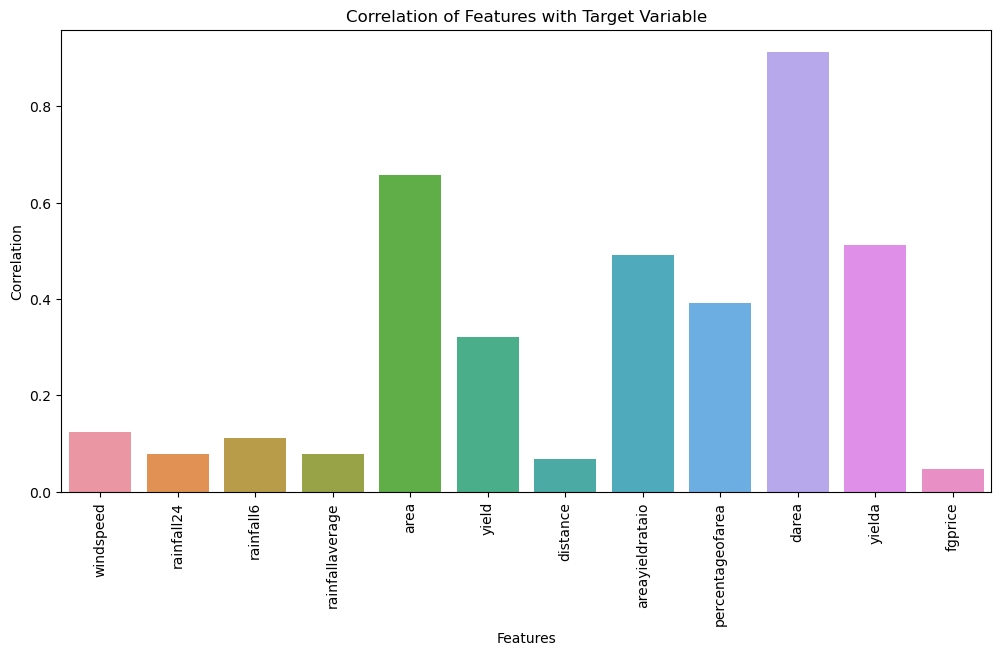

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'target' is your target variable
correlation = df.corr()['dctrice'].drop('dctrice')

# Display the correlations
print(correlation)

# Plot the correlations
plt.figure(figsize=(12, 6))
sns.barplot(correlation.index, correlation.values)
plt.title('Correlation of Features with Target Variable')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=90)
plt.show()

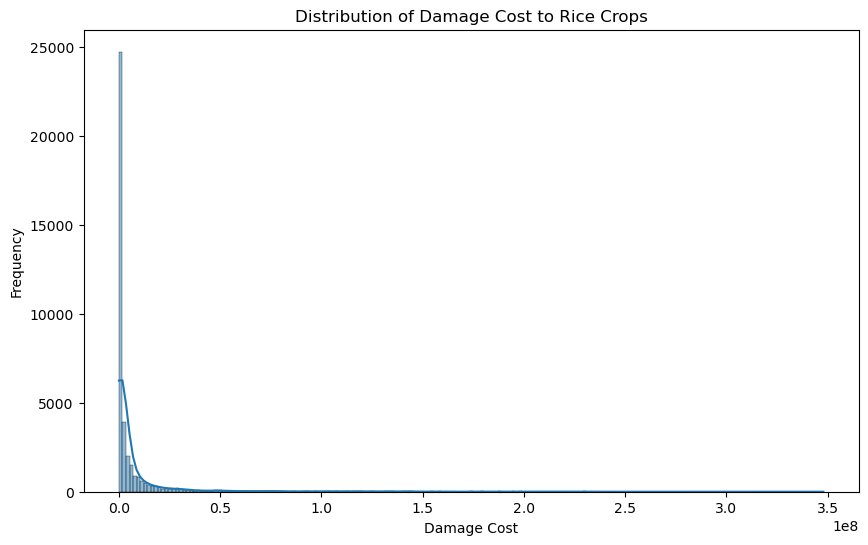

In [26]:

# Visualize the distribution of the target variable

num = len(df['dctrice'])
num_b  = int(np.sqrt(num))

plt.figure(figsize=(10, 6))
sns.histplot(df['dctrice'], bins=num_b, kde=True)
plt.title('Distribution of Damage Cost to Rice Crops')
plt.xlabel('Damage Cost')
plt.ylabel('Frequency')
plt.show()

In [15]:
import pandas as pd

correlation_matrix = df.corr()

# Display the correlation matrix in tabular form
print(correlation_matrix)

                  windspeed  rainfall24  rainfall6  rainfallaverage      area  \
windspeed          1.000000    0.343700   0.385849         0.343700  0.050195   
rainfall24         0.343700    1.000000   0.901206         1.000000  0.041834   
rainfall6          0.385849    0.901206   1.000000         0.901206  0.059019   
rainfallaverage    0.343700    1.000000   0.901206         1.000000  0.041834   
area               0.050195    0.041834   0.059019         0.041834  1.000000   
yield              0.127226    0.065524   0.086768         0.065524  0.347117   
distance           0.086782    0.125570   0.099359         0.125570  0.018181   
areayieldrataio    0.024816    0.035082   0.043171         0.035082  0.919958   
percentageofarea   0.176272    0.094566   0.117061         0.094566  0.081115   
darea              0.096300    0.074848   0.100049         0.074848  0.855471   
yielda             0.187631    0.098306   0.127721         0.098306  0.267202   
fgprice            0.017187 

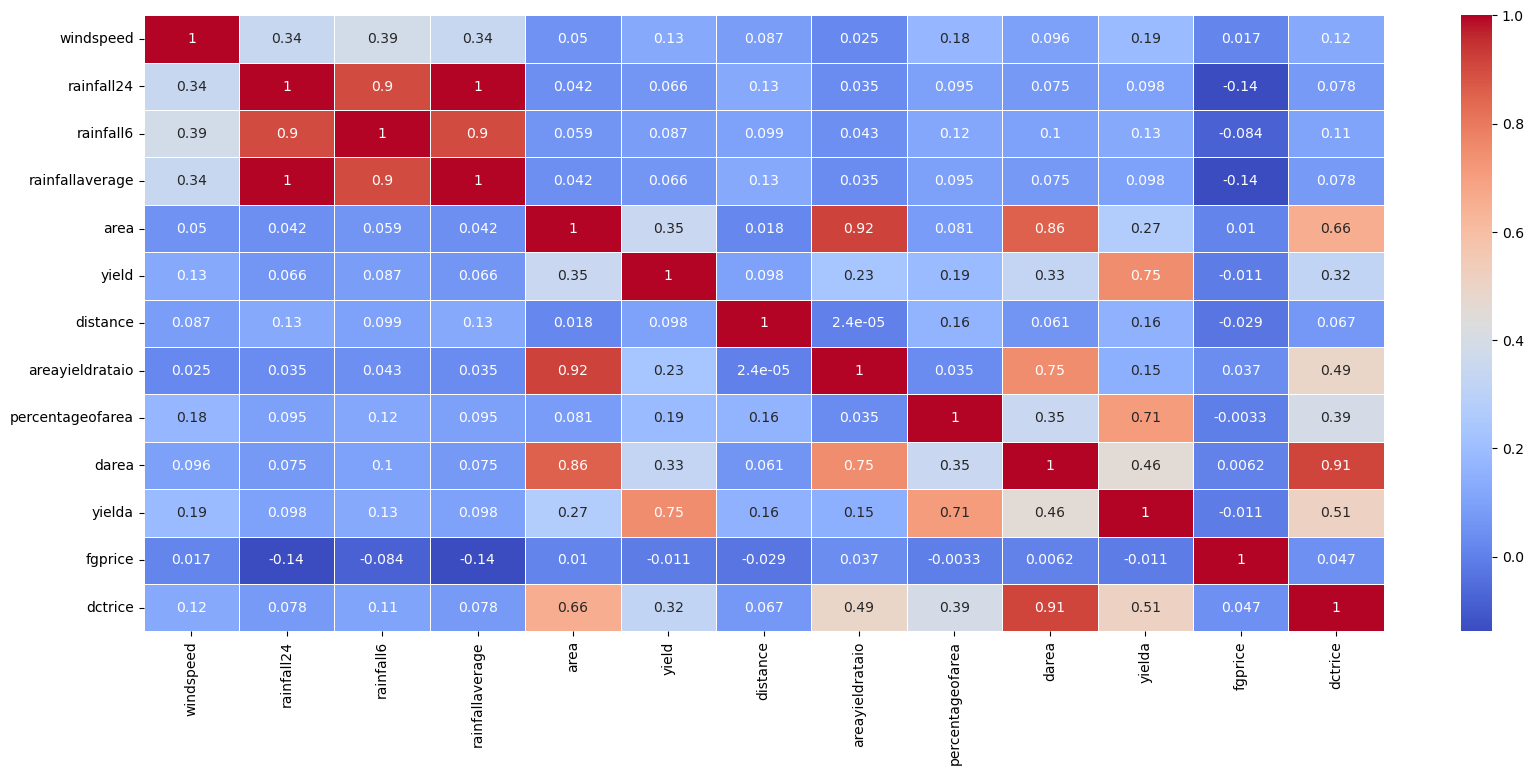

In [14]:
import seaborn as sns

correlation_matrix = df.corr()
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [ ]:
# Split the dataset into features and target variable
X = df.drop(['dctrice','percentageofarea','yielda','darea','areayieldrataio','rainfallaverage'], axis=1)
y = df.drop(['darea','percentageofarea','yielda','windspeed','rainfall24','rainfall6','rainfallaverage','areayieldrataio','area', 'yield', 'fgprice','distance'], axis=1)

In [ ]:
# # Remove the rows with zero values from the training set and testing set
# mask = X['windspeed'] != 0

# # Apply the mask to X_train
# X = X[mask]

# # Apply the mask to y_train
# y = y[mask]

In [ ]:
# Remove the rows with zero values from the training set and testing set
mask =y['dctrice'] != 0

# Apply the mask to y_train
y = y[mask]

# Apply the mask to X_train
X = X[mask]

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'target' is your target variable
correlation = df.corr()['dctrice'].drop('dctrice')

# Display the correlations
print(correlation)

# Plot the correlations
plt.figure(figsize=(12, 6))
sns.barplot(correlation.index, correlation.values)
plt.title('Correlation of Features with Target Variable')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=90)
plt.show()

In [ ]:
X.shape, y.shape

In [ ]:
X.shape, y.shape

In [ ]:
# Data split into a training set and a temporary set using an 80-20 split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Split into a validation set and a test set using a 50-50 split
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
X_val.shape, y_val.shape

In [ ]:
X_test.shape, y_test.shape

In [ ]:

X_train.shape, y_train.shape

In [ ]:
y_train.info()
X_train.info()

In [ ]:
X_test = pd.DataFrame(X_test).apply(pd.to_numeric, errors='coerce')
X_train = pd.DataFrame(X_train).apply(pd.to_numeric, errors='coerce')
y_train = pd.DataFrame(y_train).apply(pd.to_numeric, errors='coerce')
y_test = pd.DataFrame(y_test).apply(pd.to_numeric, errors='coerce')

In [ ]:
X_train.shape, y_train.shape


In [ ]:
# # Remove the rows with zero values from the training set and testing set
# mask = X_train['windspeed'] != 0

# # Apply the mask to X_train
# X_train = X_train[mask]

# # Apply the mask to y_train
# y_train = y_train[mask]

In [ ]:
# # Remove the rows with zero values from the training set and testing set
# mask =y_train['dctrice'] != 0

# # Apply the mask to X_train
# X_train = X_train[mask]

# # Apply the mask to y_train
# y_train = y_train[mask]

In [ ]:
X_train.shape, y_train.shape

In [ ]:
nan_rows = X_train[X_train.isna().any(axis=1)].index
X_train = X_train.drop(nan_rows)
y_train = y_train.drop(nan_rows)

print(np.where(pd.isnull(X_train)))

In [ ]:
X_train.shape,y_train.shape

In [ ]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_val_scaled = scaler.transform(X_val)

In [ ]:
# #Convert X_test to DataFrame

# X_test_df = pd.DataFrame(X_val_scaled)

# nan_rows = X_test_df[X_test_df.isna().any(axis=1)].index
# X_test_scaled_final = X_test_df.drop(nan_rows)

# print(np.where(pd.isnull(X_test_scaled_final)))


In [ ]:
nan_rows = X_test[X_test.isna().any(axis=1)].index
X_test = X_test.drop(nan_rows)
y_test = y_test.drop(nan_rows)

In [ ]:
nan_rows = X_val[X_val.isna().any(axis=1)].index
X_val = X_val.drop(nan_rows)
y_val = y_val.drop(nan_rows)

In [ ]:
X_test.shape, y_test.shape

In [ ]:
X_val.shape, y_val.shape

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


corrmat = X_train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

# Plot heat map
g=sns.heatmap(X_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
X_train

In [ ]:
X_val

In [ ]:
# # Remove the rows with zero values from the training set and testing set
# mask = X_val['windspeed'] != 0

# # Apply the mask to X_train
# X_val = X_val[mask]

# # Apply the mask to y_train
# y_val = y_val[mask]

In [ ]:
X_test.shape, y_test.shape

In [ ]:


# Create a pipeline with StandardScaler and SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, QuantileTransformer, RobustScaler, PowerTransformer, MaxAbsScaler


pipeline = make_pipeline(StandardScaler(), SVR(kernel='poly', C=5, degree=8, gamma='auto', coef0=8))

# Fitting the pipeline to the training set
pipeline.fit(X_train, y_train)

# model = SVR(kernel='poly', C=0.0313, degree=2, gamma=0.0281, coef0=0.0)
# model.fit(X_train, y_train)


# model = SVR(kernel='poly', C=0.5, gamma=2.7, verbose=True)
# model.fit(X_train_scaled, y_train)



# predictions = pipeline.predict(X_test)

# # Evaluate the model

# mae = mean_absolute_error(y_test, predictions)
# print(f'\nMean Absolute Error (Test): {mae}')

# # mae_percentage_test = (mae / y_test.values.mean()) * 100
# # print(f'Mean Absolute Error (Test, p.p.): {mae_percentage_test}%')



# r2 = pipeline.score(X_test, y_test)
# print(f'R-squared (Test): {r2}')


# # # Make predictions on the test set
# predictionsVal = pipeline.predict(X_val)

# # Evaluate the model

# maeV = mean_absolute_error(y_val, predictionsVal)
# print(f'\nMean Absolute Error (Validation): {maeV}')

# r2 = pipeline.score(X_val, y_val)
# print(f'R-squared (Validation): {r2}')



In [ ]:

from sklearn.metrics import explained_variance_score


predictions = pipeline.predict(X_test)

# Evaluate the model
r2 = pipeline.score(X_test, y_test)
print(f'R-squared (Test): {r2}')

mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error (Test): {mae}')

predictionsVal = pipeline.predict(X_val)

# Evaluate the model


r2 = pipeline.score(X_val, y_val)
print(f'\nR-squared (Validation): {r2}')
maev = mean_absolute_error(y_val, predictionsVal)
print(f'Mean Absolute Error (Validation): {maev}')

# Assuming `predictions` are the predicted values from your model
explained_variance = explained_variance_score(y_test, predictions)
print(f'\nExplained Variance (Test): {explained_variance}')


explained_variance = explained_variance_score(y_val, predictionsVal)
print(f'Explained Variance (Validation): {explained_variance}')


# Calculate and print MAE in percentage points for test set
mae_percentage_test = (mae / y_test.values.mean()) * 100
print(f'\nMean Absolute Error (Test, p.p.): {mae_percentage_test}%')

# Calculate and print MAE in percentage points for test set
mae_percentage_val = (mae / y_val.values.mean()) * 100
print(f'Mean Absolute Error (Validation, p.p.): {mae_percentage_val}%')


In [ ]:
print(['{:.2f}'.format(pred) for pred in predictionsVal])

In [ ]:
import matplotlib.pyplot as plt

# Make predictions
predictions = pipeline.predict(X_test)

# Create a scatter plot
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVR Model Performance: Actual vs Predicted Values')

limits = [np.min([plt.xlim(), plt.ylim()]),  # find the lower limit among x and y axes
          np.max([plt.xlim(), plt.ylim()])]  # find the upper limit among x and y axes
plt.plot(limits, limits, color='red')

plt.show()

In [ ]:
import numpy as np

# Make predictions
predictionsVal = pipeline.predict(X_val)

# Create a scatter plot
plt.scatter(y_val, predictionsVal)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVR Model Performance: Actual vs Predicted Values')

limits = [np.min([plt.xlim(), plt.ylim()]),  # find the lower limit among x and y axes
          np.max([plt.xlim(), plt.ylim()])]  # find the upper limit among x and y axes
plt.plot(limits, limits, color='red')

plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Ensure y_test and predictions are 1-dimensional
y_test = np.ravel(y_test)
predictions = np.ravel(predictions)

# Create a DataFrame with actual and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': ['{:.2f}'.format(pred) for pred in predictions]})

# Display the DataFrame
print(df.head(20))

In [ ]:

# from joblib import dump

# dump(pipeline, 'SVR.joblib')
